In [8]:
using LinearAlgebra
using GaussQuadrature
using Plots

In [9]:
function exemplo1()
    α = 1.0
    β = 1.0
    f(x) = -2.0 * α + β * x *(x-1.0)
    u(x) = x * (x - 1.0)
    return α, β, f, u
end
function Exemplo2()
    α = 1.0 
    β = 1.0
    f(x) = (α*π^2 + β) *sin(π*x)
    u(x) = sin(π*x)
    return α, β, f, u
end
function Exemplo3()
    α = 1.0 
    β = 0.0
    f(x) = 8.0
    u(x) = -4.0 * x * (x - 1.0)
    return α, β, f, u
end
function Exemplo4()
    α = 1.0 
    β = 1.0
    f(x) = x
    u(x) = x + (exp(-x) - exp(x)) / (exp(1) - exp(-1))
    return α, β, f, u
end

"Retorna os valores de `α`, `β`, `f` e `u` de acordo com o exemplo escolhido."
function dados_de_entrada(exemplo)
    if exemplo == 1
        return exemplo1()
    elseif exemplo == 2
        return Exemplo2()
    elseif exemplo == 3
        return Exemplo3()
    elseif exemplo == 4
        return Exemplo4()
    else
        error("Exemplo inválido. Escolha 1, 2, 3 ou 4.")
    end
end

dados_de_entrada

In [10]:
function make_K(n:: Int, alfa:: Float64, beta:: Float64, h:: Float64)
    K = zeros(n, n) 
    for i in 1:n-1
        K[i, i] = 2*(alfa/h + beta*h/3)
        K[i, i+1] = -alfa/h + beta*h/6
        K[i+1, i] = -alfa/h + beta*h/6
    end
    K[n, n] = 2*(alfa/h + beta*h/3)
    return K
end

make_K (generic function with 1 method)

In [11]:
function make_F(f::Function, X::Function, fi_1::Function, fi_2::Function, P::Array{Float64}, W::Array{Float64}, h::Float64, n::Int, npg::Int)
    F = zeros(n)
    for i in 1:n
        for j in 1:npg
            F[i] += h/2 * W[j] * (f(X(P[j], i)) * fi_2(P[j]) + f(X(P[j], i+1)) * fi_1(P[j]))
        end
    end
    return F
end

make_F (generic function with 1 method)

In [12]:
function X(x::Float64, h::Float64, i::Int)
    previous_x = (i - 1) * h
    return previous_x + h*(x + 1)/2
end

function fi_1(psi::Float64)
    return (1 - psi)/2
end

function fi_2(psi::Float64)
    return (1 + psi)/2
end


fi_2 (generic function with 1 method)

In [13]:
function calculate_error(C::Vector{Float64}, u::Function, X::Function, fi_1::Function, fi_2::Function, P::Array{Float64}, W::Array{Float64}, h::Float64, npg::Int, m::Int)
    error = 0
    c_ = [0; C; 0]
    for i in 1:m+1
        for j in 1:npg
            point = X(P[j], i)
            phi_1 = fi_1(P[j])
            phi_2 = fi_2(P[j])
            error += W[j] * ( u(point) - c_[i]*phi_1 - c_[i+1]*phi_2 )^2
        end
    end
    return sqrt(h*error/2)
end

calculate_error (generic function with 1 method)

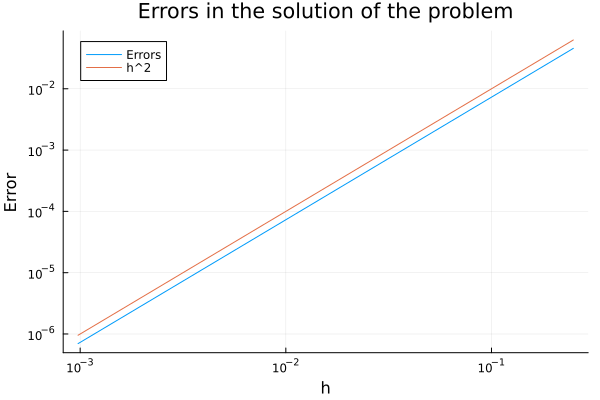

In [14]:
exemplo = 3
alfa, beta, f, u = dados_de_entrada(exemplo)

npg::Int = 5

P, W = legendre(npg)

function main()
    errors = zeros(9)
    vec_h = zeros(9)

    for i in 2:10
        m = 2^i - 1
        h::Float64 = 1/(m+1)
        vec_h[i-1] = h

        function Point(x, i)
            return X(x, h, i)
        end

        K = make_K(m, alfa, beta, h)
        F = make_F(f, Point, fi_1, fi_2, P, W, h, m, npg)

        C = K\F

        errors[i-1] = calculate_error(C, u, Point, fi_1, fi_2, P, W, h, npg, m)

    end
    c1 = Plots.plot(vec_h, errors, yscale=:log10, xscale=:log10, label="Errors", xlabel="h", ylabel="Error", title="Errors in the solution of the problem")
    Plots.plot!(c1, vec_h, vec_h.^2, yscale=:log10, xscale=:log10, legend=:topleft, label="h^2", xlabel="h", ylabel="Error")
end

main()